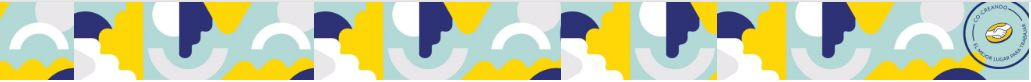

>   
    Fecha               | 12/05/2024
    Realizado por       | Francisco Guzmán
    Objetivo            | Analizar la evolución, crecimiento de internet, usuarios, suscriptores, etc. en Argentina y sus causas.

### **Descripción de la notebook**:

En esta notebook se procesa la información necesaria para alcanzar las conclusiones deseadas, para ello se tomo información de las bases de datos del **banco mundial**, y se procesaron utilizando python y la librería pandas.

Por otro lado, se tomó información el **informe de conectividad del INDEC** correspondiente al 4q del año 2023. Este documento se encontraba en **pdf**, para lo cual utilizaron técnicas de extracción de textos utilizando python y la librería **PyPDF2**.

### **Tablero con análisis visuales**

-  https://lookerstudio.google.com/reporting/2462ebfc-3bed-460b-b128-ac2779f1bdd1/page/ryozD

### **Conclusiones**

El crecimiento del internet en Argentina ha experimentado un crecimiento impulsado por el aumento de la población y la expansión de las suscripciones móviles y de banda ancha.

A medida que la infraestructura mejoraba y los servicios se volvían más accesibles, el porcentaje de usuarios de internet aumentó constantemente, alcanzando un 88.38% sobre una población de 46 MM en 2022.

Este crecimiento refleja una mayor conectividad y acceso a la información en toda la población.

Sin embargo, según datos del INDEC al 4Q 2023 hay disparidades regionales: provincias como Corrientes (6.2%), San Luis (6.4%), y Formosa (6.7%) muestran un alto acceso, mientras que otras como Santa Cruz (0.5%) y San Juan (1.2%) tienen tasas más bajas. Estas diferencias pueden deberse a factores socioeconómicos y de infraestructura.


### **Información utilizada.**
- **Población argentina** https://datos.bancomundial.org/indicador/SP.POP.TOTL
-**Individuos que utilizan Internet (% de la población)** https://data.worldbank.org/indicator/IT.NET.USER.ZS
-**Suscripciones a banda ancha fija (por cada 100 personas) - Argentina** https://datos.bancomundial.org/indicator/IT.NET.BBND
-**Suscripciones a telefonía celular móvil - Argentina** https://datos.bancomundial.org/indicator/IT.MLT.MAIN.P2
- **latitudes y longitudes de provincias argentinas** https://simplemaps.com/data/ar-cities
- **Informe INDEC Accesos a internet** https://www.indec.gob.ar/uploads/informesdeprensa/internet_03_24F142A339A1.pdf

## Librerias y accesos al drive.

In [ ]:
#importamos librerias
import pandas as pd
import gspread

In [ ]:
#importamosmodulos para autorizaciones
from google.colab import auth
from google.auth import default

try:
  import gspread
except ModuleNotFoundError:
  if 'google.colab' in str(get_ipython()):
    %pip install gspread
  import gspread

In [ ]:
#le damos acceso al colab para las google sheets
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
#le doy permiso al drive para acceder a mis files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## lectura y procesamiento de información

In [ ]:
#se define filtro para bases del banco mundial

def filtro_arg_bases_worldbank(path_data,nombre_base):
  nombre_base = pd.read_csv(path_data,skiprows=[0,1,2])
  nombre_base = nombre_base[nombre_base['Country Name']=="Argentina"]
  nombre_base = nombre_base[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']]
  nombre_base = nombre_base.T[4:]
  return nombre_base

### Población total Argentina

In [ ]:
#me quedo solo con los datos de Argentina
poblacion = filtro_arg_bases_worldbank('/content/drive/MyDrive/challenge/inputs/API_SP.POP.TOTL_DS2_es_csv_v2_8622.csv','poblacion')
column_names = ['año', 'poblacion_MM']
poblacion.reset_index(inplace=True)
poblacion.columns = column_names
poblacion['poblacion'] = [(x / poblacion.poblacion_MM[25] * 100) for x in poblacion.poblacion_MM]

In [ ]:
poblacion.head(5)

,año,poblacion_MM,poblacion
0,1997,35815971.0,77.465346
1,1998,36233195.0,78.367748
2,1999,36653031.0,79.275799
3,2000,37070774.0,80.179324
4,2001,37480493.0,81.065493


### Individuos que utilizan Internet (% de la población)

In [ ]:
#me quedo solo con los datos de Argentina
usuarios_internet = filtro_arg_bases_worldbank('/content/drive/MyDrive/challenge/inputs/API_IT.NET.USER.ZS_DS2_es_csv_v2_11914.csv','usuarios_internet')
column_names = ['año', 'usuarios_internet']
usuarios_internet.reset_index(inplace=True)
usuarios_internet.columns = column_names

In [ ]:
usuarios_internet.sample(3)

,año,usuarios_internet
25,2022,88.375357
24,2021,87.150707
8,2005,17.720583


### Suscripciones a banda ancha fija (por cada 100 personas) - Argentina

In [ ]:
#me quedo solo con los datos de Argentina
suscripciones_banda_ancha = filtro_arg_bases_worldbank('/content/drive/MyDrive/challenge/inputs/API_IT.NET.BBND.P2_DS2_es_csv_v2_19531.csv','suscripciones_banda_ancha')
column_names = ['año', 'suscripciones_banda_ancha']
suscripciones_banda_ancha.reset_index(inplace=True)
suscripciones_banda_ancha.columns = column_names

In [ ]:
suscripciones_banda_ancha.tail(4)

,año,suscripciones_banda_ancha
22,2019,19.651534
23,2020,21.25312
24,2021,23.168154
25,2022,24.627633


### Suscripciones a telefonía celular móvil - Argentina

In [ ]:
#me quedo solo con los datos de Argentina
suscripciones_movil = filtro_arg_bases_worldbank('/content/drive/MyDrive/challenge/inputs/API_IT.CEL.SETS.P2_DS2_es_csv_v2_52791.csv','suscripciones_movil')
column_names = ['año', 'suscripciones_movil']
suscripciones_movil.reset_index(inplace=True)
suscripciones_movil.columns = column_names

In [ ]:
suscripciones_movil.head(5)

,año,suscripciones_movil
0,1997,5.609433
1,1998,7.371312
2,1999,10.500821
3,2000,17.501523
4,2001,17.987467


## inputs tablero

In [ ]:
# creo un solo df para los inputs_tablero
df = pd.DataFrame({'año': poblacion.año})
## Agregar todos los datos a un solo file
poblacion_MM = dict(zip(poblacion.año,poblacion.poblacion_MM))
poblacion = dict(zip(poblacion.año,poblacion.poblacion))
usuarios_internet = dict(zip(usuarios_internet.año,usuarios_internet.usuarios_internet))
suscripciones_banda_ancha = dict(zip(suscripciones_banda_ancha.año,suscripciones_banda_ancha.suscripciones_banda_ancha))
suscripciones_movil = dict(zip(suscripciones_movil.año,suscripciones_movil.suscripciones_movil))
df["poblacion_MM"] = df.año.map(poblacion_MM)
df["poblacion"] = df.año.map(poblacion)
df["usuarios_internet"] = df.año.map(usuarios_internet)
df["suscripciones_banda_ancha"] = df.año.map(suscripciones_banda_ancha)
df["suscripciones_movil"] = df.año.map(suscripciones_movil)
df = df.fillna(0)

In [ ]:
df #se visualiza el contenido del file a compartir

,año,poblacion_MM,poblacion,usuarios_internet,suscripciones_banda_ancha,suscripciones_movil
0,1997,35815971.0,77.465346,0.280340,0.000000,5.609433
1,1998,36233195.0,78.367748,0.830767,0.000000,7.371312
2,1999,36653031.0,79.275799,3.284482,0.000000,10.500821
3,2000,37070774.0,80.179324,7.038683,0.000000,17.501523
4,2001,37480493.0,81.065493,9.780807,0.250797,17.987467
5,2002,37885028.0,81.940451,10.882124,0.390656,17.333338
6,2003,38278164.0,82.790753,11.913697,0.676231,20.487485
7,2004,38668796.0,83.635640,16.036684,1.403920,34.943894
8,2005,39070501.0,84.504476,17.720583,2.371922,56.708835
9,2006,39476851.0,85.383359,20.927202,4.011751,79.819920


In [ ]:
#actualizo la hoja de google de inputs
spreadsheet = gc.open_by_key('1ZKDwgJ1G3itITMmrOk9fIjEPn453qmtulCup0FmtWFM')
worksheet = spreadsheet.sheet1

In [ ]:
#actualiza los valores de la hoja de excel
worksheet.update([df.columns.values.tolist()] + df.values.tolist(), 'A1')
spreadsheet_url = spreadsheet.url
print("Spreadsheet URL:", spreadsheet_url)

Spreadsheet URL: https://docs.google.com/spreadsheets/d/1ZKDwgJ1G3itITMmrOk9fIjEPn453qmtulCup0FmtWFM


### Informe INDEC Accesos a internet


In [ ]:
#instalo libreria requerida
!pip install PyPDF2

In [ ]:
#se importa la libreria
import PyPDF2

In [ ]:
pdf_reader = PyPDF2.PdfReader('/content/drive/MyDrive/challenge/inputs/internet_03_24F142A339A1.pdf')

In [ ]:
#se identifica la cantidad de paginas del pdf
print("Cantidad de hojas detectadas",len(pdf_reader.pages))

Cantidad de hojas detectadas 11


In [ ]:
#creo lista vacia
text_data = []
#itero sobre las paginas del pdf
for page_num in range(len(pdf_reader.pages)):
    #se extraen textos de las paginas
    page_text = pdf_reader.pages[page_num].extract_text()
    # apendeamos a la lista de textos
    text_data.append(page_text)

In [ ]:
df_2 = pd.DataFrame({'Text': text_data})

In [ ]:
coordenadas = pd.read_csv('/content/drive/MyDrive/challenge/inputs/ar.csv') #informacion de las coordenadas

In [ ]:
coordenadas[coordenadas.city.isin(["Córdoba","La Rioja","Formosa"])] #las plotea mal pero es error del looker

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
1,Córdoba,-31.4167,-64.1833,Argentina,AR,Córdoba,admin,2106734.0,1329604.0
21,Formosa,-26.1833,-58.1833,Argentina,AR,Formosa,admin,234000.0,222226.0
31,La Rioja,-29.4125,-66.8542,Argentina,AR,La Rioja,admin,180995.0,180995.0


In [ ]:
#se le da el mismo valor que el informe del INDEC
coordenadas["city"] = coordenadas["city"].replace(["Resistencia", "Comodoro Rivadavia","Paraná","San Salvador de Jujuy","Posadas","General Roca","Río Gallegos","Banda del Río Salí","Ushuaia","General Pico"],
                                          ["Chaco","Chubut","Entre Ríos","Jujuy","Misiones","Río Negro","Santa Cruz","Tucumán","Tierra del Fuego","La Pampa"])

In [ ]:
#coordenadas
latitud = dict(zip(coordenadas.city,coordenadas.lat))
longitud = dict(zip(coordenadas.city,coordenadas.lng))

In [ ]:
mylist = df_2.Text[2].split('\n')

In [ ]:
#me quedo con la lista de los porcentajes identificados y les arreglo el formato.
porcentajes = [x.strip() for x in mylist[19:41]]

fixed_list = []

# itero sobre la lista
for element in porcentajes:
    #le hago split por espacio
    parts = element.split()
    # itero sobre cada parte y saco el caracter especial identificado
    for part in parts:
      if part != '%':
        # apendeo a la lista
        fixed_list.append(part)

In [ ]:
provincias = ['Buenos Aires','Catamarca', 'Chaco', 'Chubut', 'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy','Mendoza', 'Misiones', 'Neuquén',
            'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz', 'Santa Fe', 'Santiago del Estero', 'Tucumán','Tierra del Fuego', 'La Rioja','La Pampa'] #nueva lista de provincias

In [ ]:
Accesos_a_internet = pd.DataFrame({'provincia': provincias, 'porcentaje': fixed_list})
Accesos_a_internet.porcentaje = [float(str(x).replace(',','.')) for x in Accesos_a_internet.porcentaje]

In [ ]:
Accesos_a_internet['latitud'] = Accesos_a_internet.provincia.map(latitud)
Accesos_a_internet['longitud'] = Accesos_a_internet.provincia.map(longitud)

In [ ]:
Accesos_a_internet #muestro la info que toma de input el tablero

,provincia,porcentaje,latitud,longitud
0,Buenos Aires,2.4,-34.6033,-58.3817
1,Catamarca,5.4,-28.4667,-65.7833
2,Chaco,4.9,-27.4514,-58.9867
3,Chubut,1.0,-45.8647,-67.4808
4,Córdoba,4.3,-31.4167,-64.1833
5,Corrientes,6.2,-27.4833,-58.8167
6,Entre Ríos,5.3,-31.7331,-60.5297
7,Formosa,6.7,-26.1833,-58.1833
8,Jujuy,5.9,-24.1833,-65.3000
9,Mendoza,2.9,-32.8833,-68.8167


In [ ]:
#Para actualizar la hoja de google
spreadsheet = gc.open_by_key('1Kg7Vc_181jJ-cOvVpjWGV2-vgLgbZI3Sl666cbdLZas')
worksheet = spreadsheet.sheet1

In [ ]:
#actualiza los valores de la hoja de excel
worksheet.update([Accesos_a_internet.columns.values.tolist()] + Accesos_a_internet.values.tolist(), 'A1')
spreadsheet_url = spreadsheet.url
print("Spreadsheet URL:", spreadsheet_url)

Spreadsheet URL: https://docs.google.com/spreadsheets/d/1Kg7Vc_181jJ-cOvVpjWGV2-vgLgbZI3Sl666cbdLZas
